# Montecarlo Packet Visualization

`RPacketPlotter` plots the `RPackets` that are generated by the [Montecarlo](https://tardis-sn.github.io/tardis/physics/montecarlo/index.html) method and creates an animated plot that contains the packet trajectories as they move away from the photosphere.
The properties of individual RPackets are taken from the [rpacket_tracker](https://tardis-sn.github.io/tardis/io/output/rpacket_tracking.html).

`RPacketPlotter` uses the properties (specifically, `mu` and `r`) present in the `rpacket_tracker` to calculate the coordinates of packets as they move through the ejecta. In the following section, the mathematical expression for getting the angle(θ) of packets with respect to the x-axis is shown, which can be used (along with radius `r`) to calculate the x and y coordinates of packets.

## Getting packet coordinates

\
<img src="attachment:packet_diagram.jpg" style="width:400px">

<br><br>The diagram above shows the packet trajectory as it starts from photosphere `P0` and continues to move along the subsequent points `P1`, `P2`, and so on.

<div class="alert alert-info">

Note
    
Here `μ` represents the direction of packet propagation with respect to the radial line.
    
</div>

To determine the polar coordinates of any arbitrary point, say `P2`, we need `r2` and `θ2`. `r2` is already present in the array obtained from the simulation. To determine `θ2`, we use the sine rule and apply it to the triangle `OP1P2`, where `O` is the center.

$$
\frac{r_{2}}{\sin(\pi - \mu_{1})} = \frac{r_{1}}{\sin(\alpha)}
$$

Now, writing `α` in terms of `μ1` and `θ2`

$$ 
α = μ_{1} - θ_{2}
$$
$$
\frac{r_{2}}{\sin(\pi - \mu_{1})} = \frac{r_{1}}{\sin(μ_{1} - θ_{2})}
$$

Thus,

$$ 
θ_{2} = -\sin^{-1}(\frac{r1}{r2}\sin(\mu_{1})) + \mu_{1}
$$

Hence, for `i-th` point, `θ` will be:

$$ 
θ_{i} = -\sin^{-1}(\frac{r_{i-1}}{r_{i}}\sin(\mu_{i-1})) + \mu_{i-1}
$$

## Running the simulation

In [ ]:
from tardis import run_tardis
from tardis.io.config_reader import Configuration
from tardis.io.atom_data.util import download_atom_data

# We download the atomic data needed to run the simulation
download_atom_data('kurucz_cd23_chianti_H_He')

In [ ]:
# Reading the Configuration stored in `tardis_example.yml` into config

config = Configuration.from_yaml("tardis_example.yml")

In [ ]:
# changing config file for enabling the rpacket_tracking

config["montecarlo"]["tracking"]["track_rpacket"]=True

In [ ]:
sim = run_tardis(config, show_progress_bars=False)

## Plotting Packets with RPacketPlotter

Importing the RPacketPlotter

In [ ]:
from tardis.visualization import RPacketPlotter

Now, we create an RPacketPlotter object `rpacket_plotter` that will be used to generate a plot.

`no_of_packets` can be specified as a parameter to the `from_simulation` class method. By default, `15` packets will used to create a plot.

In [ ]:
rpacket_plotter = RPacketPlotter.from_simulation(sim, no_of_packets=20)

Using the `rpacket_plotter` we use the `generate_plot` method to create a plot.

Here the `theme` parameter can be defined. Currently, we have 2 themes, i.e. `light` and `dark`. By Default the `light` theme will be plotted.

### Light Theme

In [ ]:
rpacket_plotter.generate_plot().show(renderer="notebook_connected")

### Dark Theme

In [ ]:
rpacket_plotter.generate_plot(theme="dark").show(renderer="notebook_connected")

## Using Animation and Other interactive features

The `Play` button at the bottom-left can be used to start the animation. The animation can be paused at any time using the `pause` button. Also, the `timeline slider` can be used to reach any point in the animation. A demo is shown below.
<br><br>
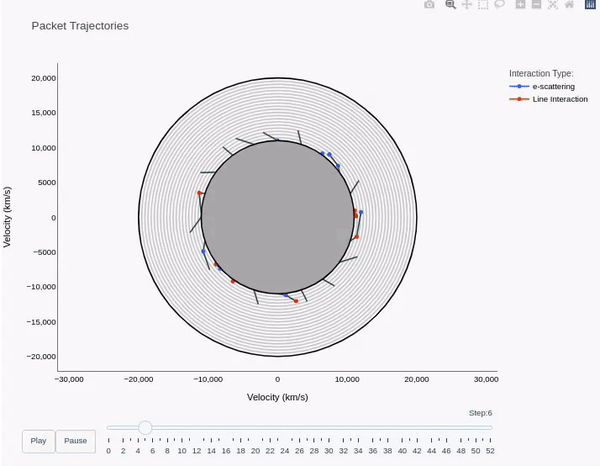
<br><br>

Hovering over any packet will show its properties like its coordinates, interaction type, etc. The `zoom-in` feature can be used to view a particular part of the plot. The demo below shows these features.
<br><br>
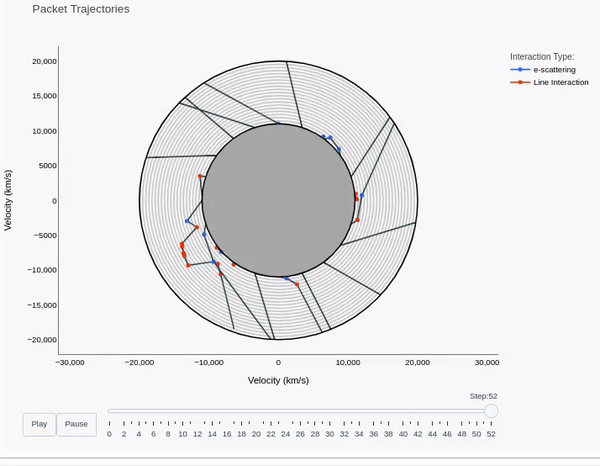